# init

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["font.size"] = 30  # フォントサイズ

# chaos1

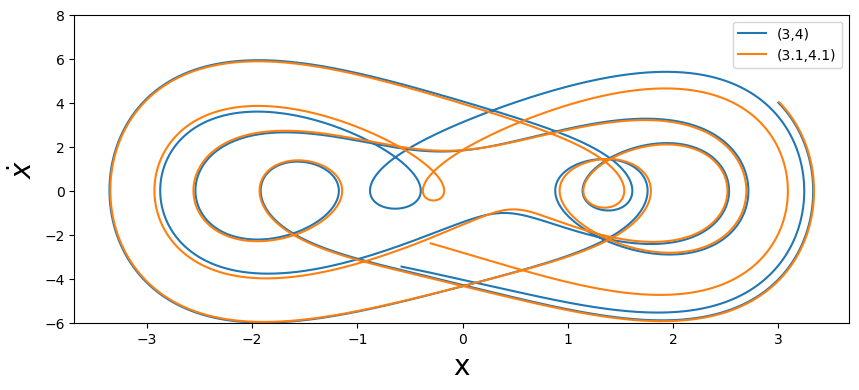

In [1]:
def forward_r(x,y,i,h):
        x_i=x
        y_i=y

        x_iplus1=x_i+h*y_i
        y_iplus1=y_i+h*(-0.05*y_i-x_i**3+7.5*np.cos(i*h))

        return x_iplus1,y_iplus1

def forward(x,y,i,h):
        x_i=x
        y_i=y

        x_iplus1=x_i+h*y_i
        y_iplus1=y_i+h*(-0.05*y_i-x_i**3+7.5*np.cos(i*h))

        return x_iplus1,y_iplus1

iteration=20000
h=0.001

x_0_1=3
y_0_1=4
x_1=[x_0_1]
y_1=[y_0_1]

x_0_2=3.01
y_0_2=4.01

x_2=[x_0_2]
y_2=[y_0_2]

for i in range(iteration):
    x_iplus1,y_iplus1=forward(x_1[i],y_1[i],i,h)
    x_1.append(x_iplus1)
    y_1.append(y_iplus1)

    x_iplus1,y_iplus1=forward(x_2[i],y_2[i],i,h)
    x_2.append(x_iplus1)
    y_2.append(y_iplus1)

fig=plt.figure(figsize=(10,4))
ax=fig.subplots()
ax.plot(x_1,y_1,label="(3,4)")
ax.plot(x_2,y_2,label="(3.1,4.1)")
ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("$\dot{x}$",fontsize=20)
ax.set_ylim(-6,8)
ax.legend()

# chaos2

## euler??

  0%|          | 0/100000000 [00:00<?, ?it/s]

100%|██████████| 100000000/100000000 [02:37<00:00, 636468.52it/s]


Text(0, 0.5, '$\\dot{x}$')

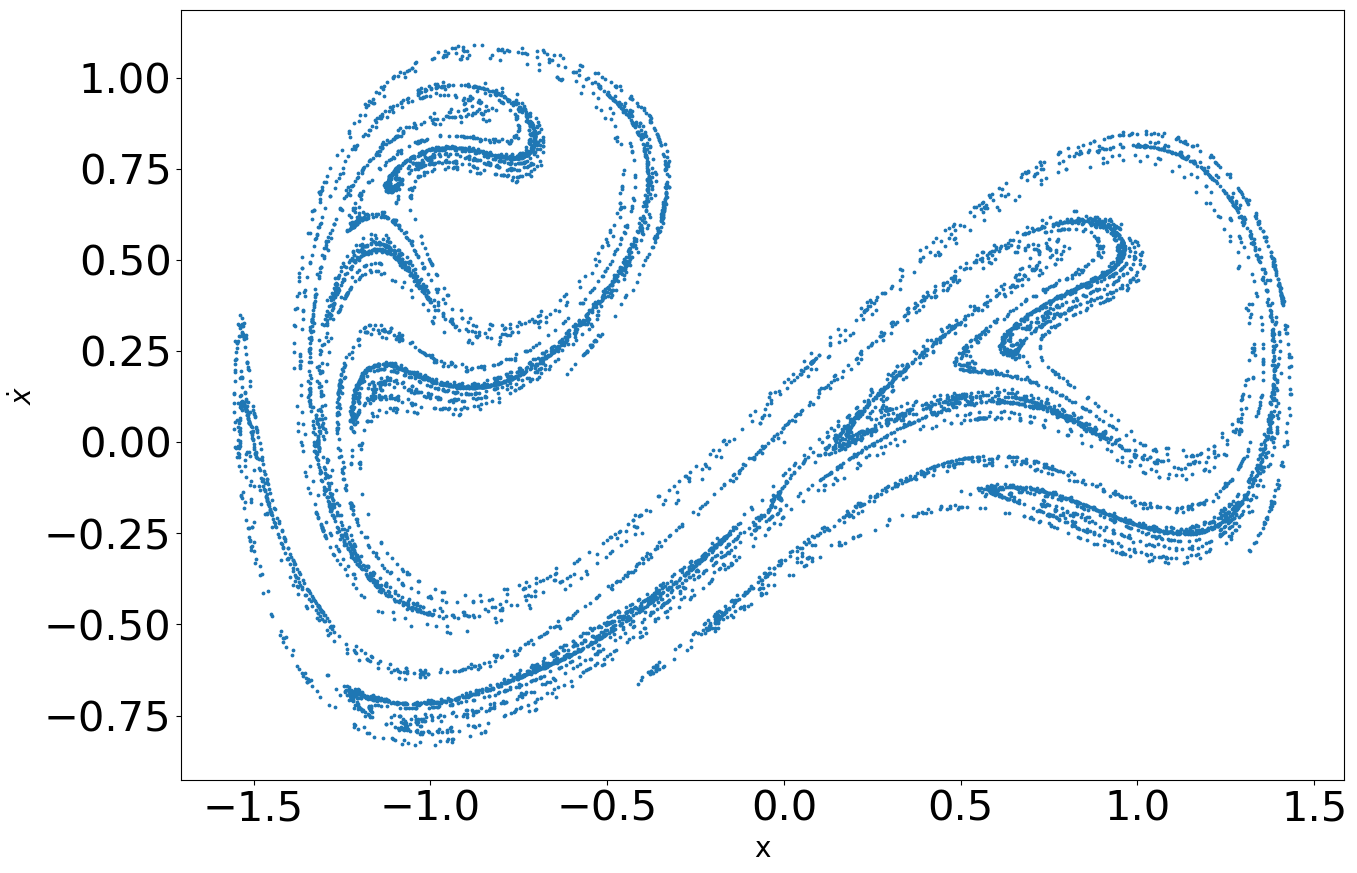

In [4]:
import numpy as np
from tqdm import tqdm
iteration=100000000
h=0.0005
x_0=0
y_0=0
x=[x_0]
y=[y_0]

def forward(x,y,i,h):
        x_i=x
        y_i=y

        x_iplus1=x_i+h*y_i
        y_iplus1=y_i+h*(x_i-x_i**3-0.1*y_i+0.35*np.cos(1.4*i*h))

        return x_iplus1,y_iplus1

for i in tqdm(range(iteration)):
    x_iplus1,y_iplus1=forward(x[i],y[i],i,h)
    x.append(x_iplus1)
    y.append(y_iplus1)  

fig=plt.figure(figsize=(15,10))
ax=fig.subplots()
omega=1.4

max=int(iteration*h/(2*np.pi/omega))

x_points=[x[int((2*np.pi*i/omega)/h)] for i in range(max)]
y_points=[y[int((2*np.pi*i/omega)/h)] for i in range(max)]

ax.scatter(x_points,y_points,s=3)

ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("$\dot{x}$",fontsize=20)  

## euler???

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

iteration=10000000
h=0.011
x_0=0
y_0=0
x=[x_0]
y=[y_0]

def forward(x,y,i,h):
        x_i=x
        y_i=y

        x_iplus1=x_i+h*y_i
        y_iplus1=y_i+h*(x_i-x_i**3-0.1*y_i+0.35*np.cos(1.4*i*h))

        return x_iplus1,y_iplus1

for i in tqdm(range(iteration)):
    x_iplus1,y_iplus1=forward(x[i],y[i],i,h)
    x.append(x_iplus1)
    y.append(y_iplus1)  

fig=plt.figure(figsize=(15,10))
ax=fig.subplots()
omega=1.4

max=int(iteration*h/(2*np.pi/omega))

x_points=[x[int((2*np.pi*i/omega)/h)] for i in range(max)]
y_points=[y[int((2*np.pi*i/omega)/h)] for i in range(max)]

ax.scatter(x_points,y_points,s=3)

ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("$\dot{x}$",fontsize=20)  

## runge kutta1

https://qiita.com/shokishimada/items/acdb1e736d8f441d27d1
参考

In [6]:
from tqdm import tqdm
def X(x, y, t):#dx/dy=X
    return y

def Y(x, y, t):
    return x-x**3-0.1*y+0.35*np.cos(1.4*t)


def forward_r(x,y,i,h):
        x_i=x
        y_i=y
        t=i*h
        
        a_x=X(x_i, y_i, t)
        a_y=Y(x_i, y_i, t)
        
        b_x=X(x_i+a_x*h/2, y_i+a_y*h/2, t+h/2)
        b_y=Y(x_i+a_x*h/2, y_i+a_y*h/2, t+h/2)
        
        c_x=X(x_i+b_x*h/2, y_i+b_y*h/2, t+h/2)
        c_y=Y(x_i+b_x*h/2, y_i+b_y*h/2, t+h/2)
        
        d_x=X(x_i+h*c_x, y_i+h*c_y, t+h)
        d_y=Y(x_i+h*c_x, y_i+h*c_y, t+h)
        
        x_iplus1=x_i+h*(a_x+2*b_x+2*c_x+d_x)/6
        y_iplus1=y_i+h*(a_y+2*b_y+2*c_y+d_y)/6
        return x_iplus1,y_iplus1
        

def forward(x,y,i,h):
        x_i=x
        y_i=y
        t=i*h
        
        x_iplus1=x_i+h*X(x_i, y_i, t)
        y_iplus1=y_i+h*Y(x_i, y_i, t)

        return x_iplus1,y_iplus1

### param1

100%|██████████| 100000000/100000000 [12:07<00:00, 137539.16it/s]


Text(0, 0.5, '$\\dot{x}$')

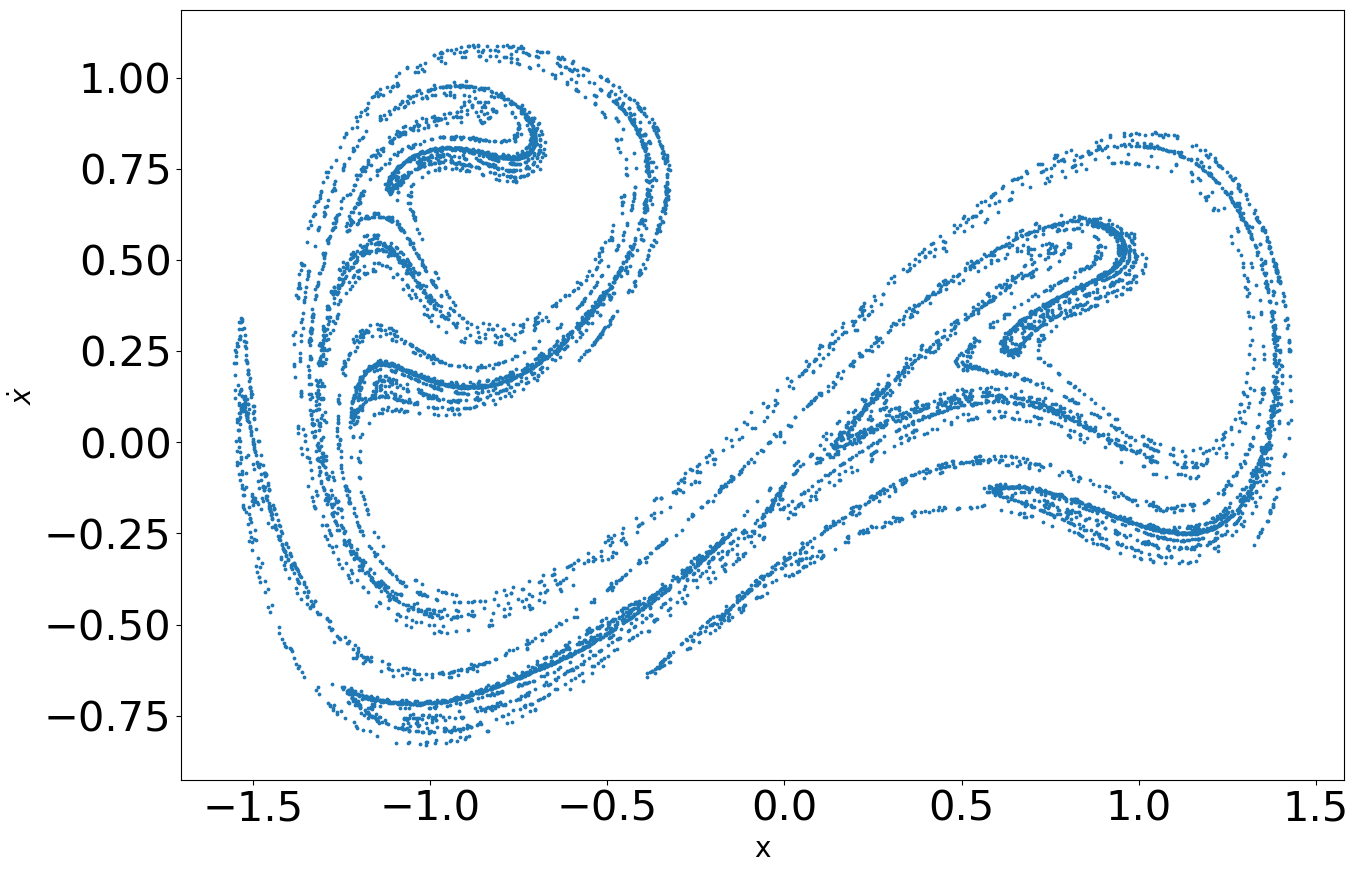

In [7]:
iteration=100000000
#         10000000
h=0.0005# 0.01 is also ok.
x_0=0
y_0=0
x=[x_0]
y=[y_0]

for i in tqdm(range(iteration)):#forwardの指定
    x_iplus1,y_iplus1=forward_r(x[i],y[i],i,h)
    x.append(x_iplus1)
    y.append(y_iplus1)  

fig=plt.figure(figsize=(15,10))
ax=fig.subplots()
omega=1.4

max=int(iteration*h/(2*np.pi/omega))

x_points=[x[int((2*np.pi*i/omega)/h)] for i in range(max)]
y_points=[y[int((2*np.pi*i/omega)/h)] for i in range(max)]

ax.scatter(x_points,y_points,s=3)

ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("$\dot{x}$",fontsize=20)  

## runge kutta2 with series
ポアンカレ断面のプログラムは
これより前が試作したものであり、これ以降が実際に使いやすいものとなっている。

・周期Tという定数を導入し、略称することで見やすくした。
・iterationの値は元文献では、
iteration=100000000 h=0.00001 とかだった気がする??
この時オイラー法を使用。

しかしこれをルンゲクッタでも用いると計算時間がすさまじいので

iteration=10000000 に変更

これだと十分な時間確保ができていない。またアトラクター表示がうまくいくかの精度を試すために、
h=0.01 に変更

ルンゲクッタだとうまくいく。
オイラー法でこの(iteration, h) の値を使用してもうまくいかない。

アトラクター観測では明らかにルンゲクッタの方が優秀。

scatter の説明
https://qiita.com/supersaiakujin/items/ef85dd247cefdfbd2e2a

方程式参考
https://qiita.com/shokishimada/items/acdb1e736d8f441d27d1


In [8]:
from tqdm import tqdm
def X(x, y, t):#dx/dy=X
    return y

def Y(x, y, t):
    return x-x**3-0.1*y+0.35*np.cos(1.4*t)
def forward_r(x,y,i,h):
        x_i=x
        y_i=y
        t=(i-1)*h
        
        a_x=X(x_i, y_i, t)
        a_y=Y(x_i, y_i, t)
        
        b_x=X(x_i+a_x*h/2, y_i+a_y*h/2, t+h/2)
        b_y=Y(x_i+a_x*h/2, y_i+a_y*h/2, t+h/2)
        
        c_x=X(x_i+b_x*h/2, y_i+b_y*h/2, t+h/2)
        c_y=Y(x_i+b_x*h/2, y_i+b_y*h/2, t+h/2)
        
        d_x=X(x_i+h*c_x, y_i+h*c_y, t+h)
        d_y=Y(x_i+h*c_x, y_i+h*c_y, t+h)
        
        x_iplus1=x_i+h*(a_x+2*b_x+2*c_x+d_x)/6
        y_iplus1=y_i+h*(a_y+2*b_y+2*c_y+d_y)/6
        return x_iplus1,y_iplus1
        

def forward(x,y,i,h):
        x_i=x
        y_i=y
        t=(i-1)*h
        
        x_iplus1=x_i+h*X(x_i, y_i, t)
        y_iplus1=y_i+h*Y(x_i, y_i, t)

        return x_iplus1,y_iplus1


### series

ここでは時間方向の解の変遷をプロットしよう
https://qiita.com/shokishimada/items/acdb1e736d8f441d27d1
参考

100%|██████████| 1000000/1000000 [00:07<00:00, 133123.30it/s]


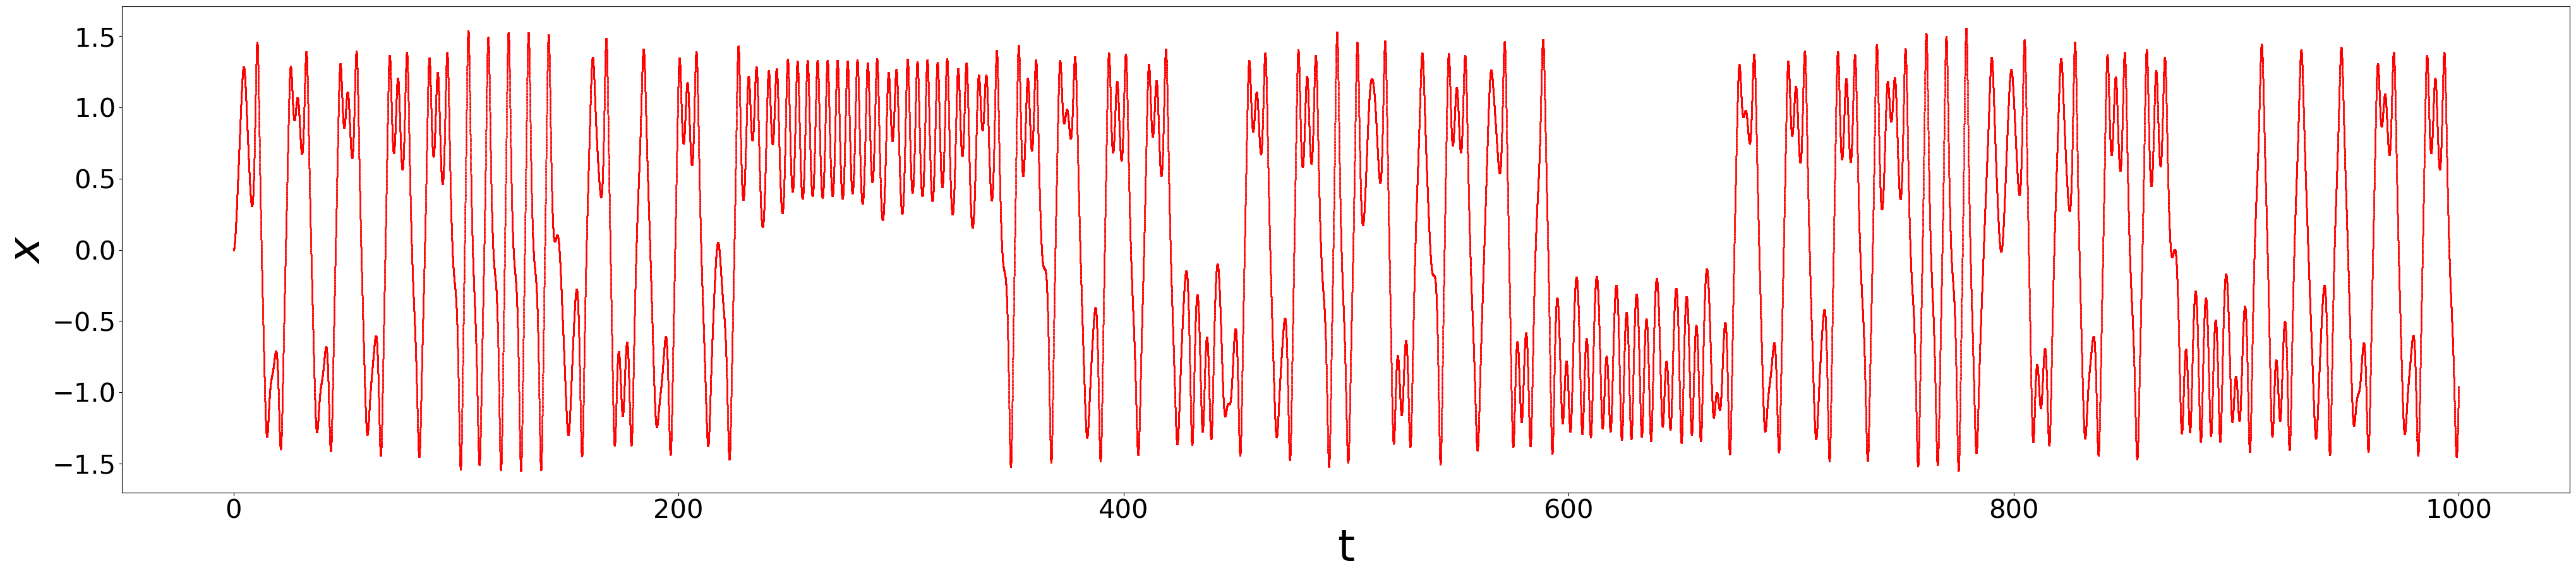

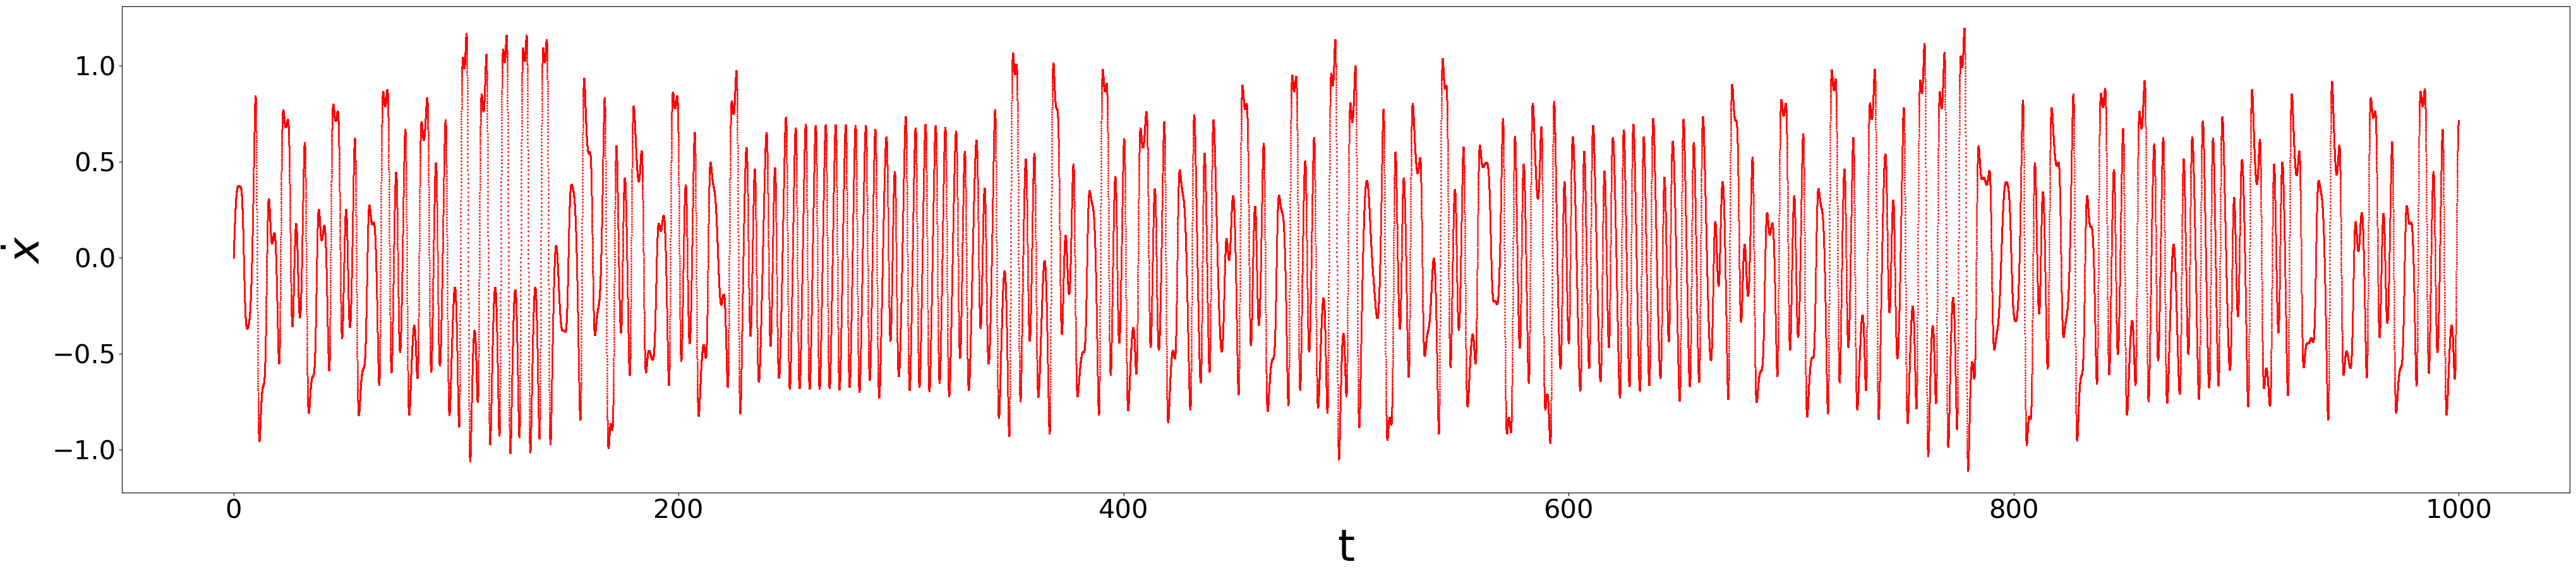

In [9]:
iteration=1000000
h=0.01
x_0=0
y_0=0
x=[x_0]
y=[y_0]

for i in tqdm(range(iteration)):#forwardの指定
    x_iplus1,y_iplus1=forward_r(x[i],y[i],i,h)
    x.append(x_iplus1)
    y.append(y_iplus1)  

omega=1.4
T=2*np.pi/omega

#max=iteration このプログラムにおいてはこのmaxは長すぎて見づらい
max=int(iteration/10)


#事前のパラメータ準備はここまで
#graph x
fig=plt.figure(figsize=(50,10))
ax=fig.subplots()

t_points=[float(i)*h for i in range(max)]#連番の配列作り方で検索、別に整数である必要ない。
x_points=[x[i] for i in range(max)]

ax.scatter(t_points,x_points,c='red', s=1, marker='o')

ax.set_xlabel("t",fontsize=50)
ax.set_ylabel("${x}$",fontsize=50)  
ax.tick_params(labelsize=30)

#graph dotx
fig1=plt.figure(figsize=(50,10))
ax1=fig1.subplots()

dotx_points=[y[i] for i in range(max)]

ax1.scatter(t_points,dotx_points,c='red', s=1, marker='o')

ax1.set_xlabel("t",fontsize=50)
ax1.set_ylabel("$\dot{x}$",fontsize=50)  
ax1.tick_params(labelsize=30)

### param1

In [ ]:
iteration=1000000
h=0.01
x_0=0
y_0=0
x=[x_0]
y=[y_0]

for i in tqdm(range(iteration)):#forwardの指定
    x_iplus1,y_iplus1=forward_r(x[i],y[i],i,h)
    x.append(x_iplus1)
    y.append(y_iplus1)  

omega=1.4
T=2*np.pi/omega
max=int(iteration*h/T)

#attractor 
fig=plt.figure(figsize=(15,10))
ax=fig.subplots()

x_points=[x[int(T*i/h)] for i in range(max)]
y_points=[y[int(T*i/h)] for i in range(max)]

ax.scatter(x_points,y_points,s=3)

ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("$\dot{x}$",fontsize=20)  

#time-direction graph x
fig1=plt.figure(figsize=(50,10))
ax1=fig1.subplots()

x_points=[x[int(T*i/h)] for i in range(max)]
t_points=[T*i for i in range(max)]

ax1.scatter(t_points,x_points,c='red', s=5, marker='o')

ax1.set_xlabel("t",fontsize=20)
ax1.set_ylabel("${x}$",fontsize=20) 

#time-direction graph dotx
fig2=plt.figure(figsize=(50,10))
ax2=fig2.subplots()

dotx_points=[y[int(T*i/h)] for i in range(max)]

ax2.scatter(t_points,dotx_points,c='red', s=5, marker='o')

ax2.set_xlabel("t",fontsize=20)
ax2.set_ylabel("$\dot{x}$",fontsize=20) 

### param2

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
iteration=10000000
h=0.01
x_0=0
y_0=0
x=[x_0]
y=[y_0]


for i in tqdm(range(iteration)):#forwardの指定
    x_iplus1,y_iplus1=forward_r(x[i],y[i],i,h)
    x.append(x_iplus1)
    y.append(y_iplus1)  

fig=plt.figure(figsize=(15,10))
ax=fig.subplots()
omega=1.4
T=2*np.pi/omega
max=iteration

x_points=[x[i] for i in range(max)]
y_points=[y[i] for i in range(max)]

ax.scatter(x_points,y_points,s=3)

ax.set_xlabel("x",fontsize=20)
ax.set_ylabel("$\dot{x}$",fontsize=20)  

# logistic

/tmp/ipykernel_3221676/95164865.py:9: RuntimeWarning: overflow encountered in scalar multiply
  x.append(a * x[-1] * (1 - x[-1]))


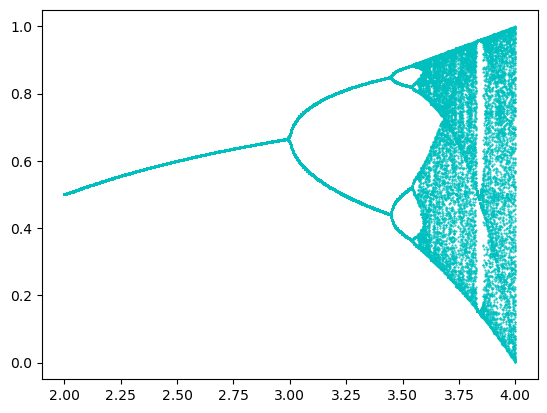

elapsed_time:0.775719165802002[sec]


In [3]:
from multiprocessing import Process
import time
import numpy as np
import matplotlib.pyplot as plt

def logistic(a):
    x = [0.8]
    for i in range(400):
        x.append(a * x[-1] * (1 - x[-1]))
    return x[-100:]

start = time.time()#開始時間計測


for a in np.linspace(2.0, 5.0, 1000):
    x = logistic(a)
    #print([a], x)
    plt.plot([a]*len(x), x, "c.", markersize=1.0)
"""
figsizeは基本使いものにならない,
rcParamsを使う

"""

plt.rcParams["figure.figsize"] = (40, 20)#(縦, 横)
fig=plt.figure#(figsize=(100,100))
plt.show()

elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

# 並列計算チャレンジ

参考サイト
https://qiita.com/simonritchie/items/1ce3914eb5444d2157ac

process_list = []
for i in range(10):
    process = Process(
        target=sample_func,
        kwargs={'process_index': i})
    process.start()
    process_list.append(process)

for process in process_list:
    process.join()

In [ ]:
import random
import time
import threading

class SampleThreading(threading.Thread):

    def __init__(self, thread_name):
        self.thread_name = str(thread_name)
        threading.Thread.__init__(self)

    def __str__(self):
        return self.thread_name

    def run(self):#Thread library 内の関数を書き換えている??
        print('Thread: %s started.' % self)
        sleep_seconds = random.randint(5, 10)
        time.sleep(sleep_seconds)
        print('Thread: %s ended.' % self)


thread_list = []
for i in range(4):
    thread = SampleThreading(thread_name=i)
    thread.start()
    thread_list.append(thread)

for thread in thread_list:
    thread.join()

In [ ]:
from multiprocessing import Process
import time
def logistic(a):
    x = [0.8]
    for i in range(400):
        x.append(a * x[-1] * (1 - x[-1]))
    return x[-100:]

start = time.time()#開始時間計測

process_list=[]


def func(a):
    x = logistic(a)
    plt.plot([a]*len(x), x, "c.", markersize=1.7)
    
for a in np.linspace(2.0, 4.0, 1000):
    process=Process(
        target=func,
        kwargs={'a':a}
    )
    process.start()
    process_list.append(process)

#plt.show()

fig=plt.figure(figsize=(15,10))
for process in process_list:
    process.join()
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")